# Universidad Nacional de Colombia sede Medellín
# Optimizar es Divertirse
### Davinson Montoya Ramirez 71277483
### Jessica María Rivera Jiménez 1017205993
### Luis Felipe Arévalo Cortés 1018469500


## Planteamiento del problema
Se plantea la posibilidad de ajustar a ojo dos modelos de regresión, uno lineal y uno logístico, teniendo en cuenta los datos adjuntos para cada uno de los casos y haciendo uso de gráficas. Se pretende realizar el ajuste teniendo en cuenta las variaciones de parámetros en anteriroes ocasiones y se busca lograr un ajsute que sea aceptable frente a los conjuntos de datos dado.

# 1. Optimizando un modelo lineal a ojo

Se tienen en cuenta las siguientes observaciones, donde "x" representa la variable predictora y "y" representa la variable dependiente.

In [ ]:
x = [-0.06, 0.55, 0.53, 0.55, 0.83, 0.57, -0.19, 0.08, 0.60, 0.42]
y = [1.82,  2.40, 2.38, 2.40, 2.71, 2.44,  1.36, 1.75, 2.59, 2.53 ]

Para realizar el ajuste del modelo se requieren las siguientes librerías: (pyplot para graficar y numpy para operaciones algebraicas).

In [ ]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Se grafican los datos para mostrar el comportamiento de los datos. Se observa que tiene un comportamiento creciente, es decir, cuanto mayor valor tenga la variable predictora, mayor valor tiene la variable dependiente.

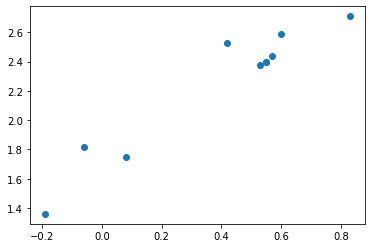

In [ ]:
# Graficar ambas funciones.
pyplot.plot(x, y, "o")

Se define una función, con la que vamos a realizar los ajustes manuales de nuestro modelo. Como parámetros de entrada se piden: "m" la pendiente de la recta y "b" el intercepto. Se define "x1" como un valor contínuo que toma "x" para poder visualizar y calcular el valor esperado. En la función, el valoy de y se expresa como el valor de la pendiente multiplicado por el valor de x1 y todo esto se le suma el intercepto. También se grafican las observaciones junto con la recta creada en nuestra función.

In [ ]:
def line(m,b):
    #El metodo "arange", genera un vector con los rangos definidos (-11 hasta 11)
    x1 = np.arange(-0.6, 1.5)
    # y sera nuestra ecuación lineal
    y1 = x1*m + b
    pyplot.plot(x, y, "o")
    pyplot.plot(x1, y1)
    

Con la función definida, y el comportamiento creciente de las observaciones, se ingresan los primeros parámetros, los cuales son pendiente (m) = 1, e intercepto (b) = 1
La gráfica resultante muestra lo siguiente (No se observa un buen ajuste):

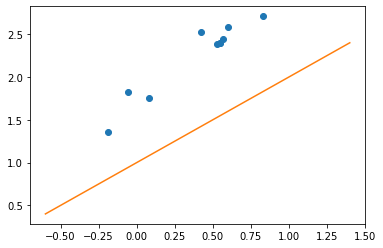

In [ ]:
line(1,1)

Como todas las observaciones se encuentran por encima de la recta, se procede a cambiar el valor del intercepto (b) = 1.4 y la pendiente se deja constante (m) = 1 (sigue sin mostrar un buen ajuste, pero mejora frente a la anterior)

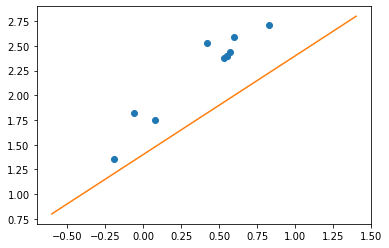

In [ ]:
line(1,1.4)

Aún se observa un comportamiento muy por debajo de las observaciones. Se aumenta el intercepto a (b) = 1.8 y la pendiente (m) permanece igual. (La recta parece estar en una altura considerable, pero podría mejorar con el cambio de pendiente)

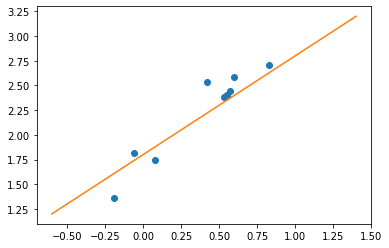

In [ ]:
line(1,1.8)

Se aumenta la pendiente (m) a 1.5 y el intercepto se deja igual (Parece mejorar un poco frente a la anterior)

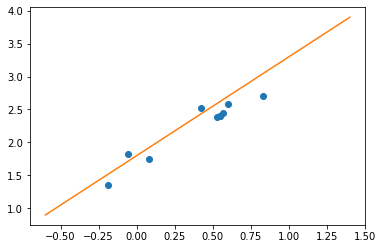

In [ ]:
line(1.5,1.8)

ajustando un poco más la gráfica, se reduce la pendiente (m) a 1.4 y el intercepto (b) a 1.7 (muestra un ajuste aceptable a simple vista)

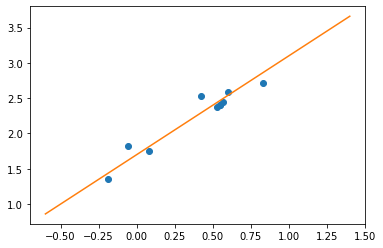

In [ ]:
line(1.4,1.7)

A continuación se muestra la evolución de las rectas ajustadas manualmente hasta encontrar el punto aceptable

In [ ]:
import seaborn

fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0


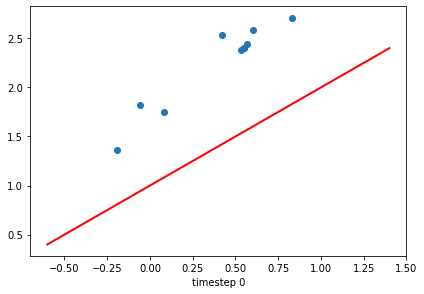

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
ax.scatter(x, y)
m = [1, 1, 1, 1.5, 1.4]
b = [1, 1.4, 1.8, 1.8, 1.7]
#El metodo "arange", genera un vector con los rangos definidos (-11 hasta 11)
x1 = np.arange(-0.6, 1.5)
# y sera nuestra ecuación lineal
line, = ax.plot(x1, x1*m[0] + b[0], 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata( x1*m[i] + b[i])
    ax.set_xlabel(label)
    return line, ax



if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 5), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()

In [ ]:
from IPython.display import HTML
# .gif necesita la librería imagemagick que puede ser instalada con !apt install imagemagick
# animation.save('poly.gif', writer='imagemagick', fps=20); 
anim.save('animation.mp4', writer='ffmpeg', fps=20);
HTML(anim.to_jshtml())

timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4


# 2. Optimizando un modelo de regresión logística a ojo

El modelo de regresión logística, tiene como objetivo clasificar un conjunto de datos, los cuales tienen como variable de salida 0 o 1. El conjunto de variables predictoras (x) muestra valores decimales con distintos valores entre 0.02 y 0.99.

A continuación se leen los datos, los cuales están separados por espacios (el argumento "sep" determina cómo deben separar los datos).

In [ ]:
data = pd.read_csv("datos_clasificacion.csv", sep= ' ') 

Se muestran los datos de forma general. Se observa que tienen 100 filas y 2 columnas.

In [ ]:
print(data)

       x  y
0   0.26  0
1   0.74  1
2   0.48  0
3   0.96  1
4   0.24  0
..   ... ..
95  0.43  0
96  0.11  0
97  0.76  1
98  0.52  0
99  0.19  0

[100 rows x 2 columns]


Se valida la información de la variable "x" en nuestro conjunto "data"

In [ ]:
data.x

0     0.26
1     0.74
2     0.48
3     0.96
4     0.24
      ... 
95    0.43
96    0.11
97    0.76
98    0.52
99    0.19
Name: x, Length: 100, dtype: float64

Las observaciones iniciales se muestran a continuación:

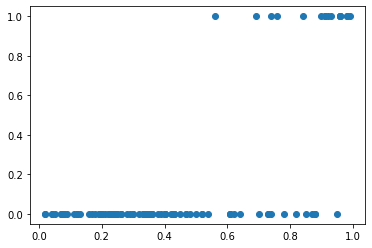

In [ ]:
pyplot.plot(data.x,data.y,'o')

Para dividir el rango de la variable predictora en 10 intervalos, y clasificar la cantidad de unos en cada región, se realiza el siguiente procedimiento:

In [ ]:
dataArray = [0,0,0,0,0,0,0,0,0,0]
for index, row in data.iterrows():
  max = data.x.max(axis = 0)
  min = data.x.min(axis = 0)
  inter = (max - min)/10.00
  for x in [0,1,2,3,4,5,6,7,8,9]:
    maxV = min + inter
    if min <= row['x'] <= maxV:
      #print(str(min) + ' <= ' +  str(row['x']) + ' <= ' + str(maxV)  )
      dataArray[x] = dataArray[x] + row['y']
    min = maxV

print(dataArray)

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0, 11.0]


El anterior código declara un arreglo matricial de 10 espacios, donde se identifica el valor mínimo y máximo del conjunto de variables predictoras. Con esto se puede calcular el ancho de cada intervalo, calculando la diferencia entre el valor máximo y mínimo y dividiendo entre 10. Ahora al valor mínimo se le suma el ancho del intervalo declarado como "inter", y se guarda en la variable maxV. Luego se compara cada observación en "x" y se van acumulando al arreglo "dataArray" aquellos valores que contengan 1, se iguala el valor "min" al valor "maxV" y se itera para cad aobservación.

Los intervalos encontrados son los siguientes:
1  

1.   (0.02 0.117)
2.   (0.117 0.214)
3.   (0.214 0.311)
4.   (0.311 0.408)
5.   (0.408 0.505)
6.   (0.505 0.602)
7.   (0.602 0.699)
8.   (0.699 0.796)
9.   (0.796 0.893)
10.  (0.893 0.99)



La gráfica resultante de la agrupación de los datos en los intervalos es la siguiente:

<BarContainer object of 10 artists>

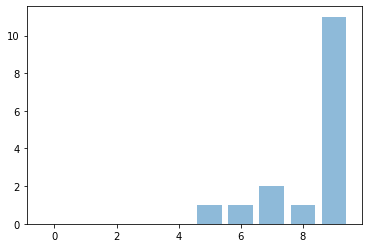

In [ ]:
plt.bar(np.arange(len(dataArray)), dataArray, align='center', alpha=0.5)

Se observa que la mayoría de valores que contienen 1, se encuentran en el último intervalo 

Se define la función regre, la cual es nuestro modelo a implementar. Como parámetros de entrada se encuentran b0 y b1, los cuales hacen variar la curva de acuerdo a los valores ingresados. xLo define una continuidad de la variables x desde 0 hasta 1.5. Se define la ecuación de la regresión logística que incluye los parámetros b1, b1 y xLo.

In [ ]:
def regre(b0,b1):
    #El metodo "arange", genera un vector con los rangos definidos (-11 hasta 11)
    xLo = np.arange(0, 1.5,0.1)
    # y sera nuestra ecuación lineal
    yLo = 1/(1 + np.exp(-( b0 + b1*xLo)))
    pyplot.plot(data.x,data.y,'o')
    pyplot.plot(xLo, yLo)

Se realiza la primera iteración asignando un parámetro de b0 = 2 y b1 = 1. El resultado es el siguiente:

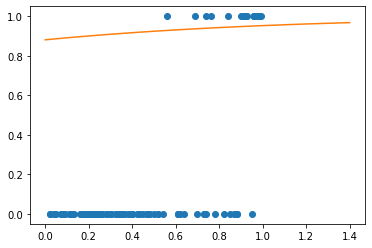

In [ ]:
regre(2,1)

El parámetro b0 se reduce a 0.5 y el b1 se iguala a 0.5. El gráfico mejora pero aún existe preferencia por seleciconar los valores para que den 1

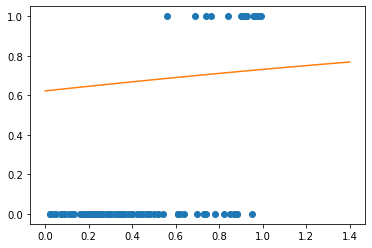

In [ ]:
regre(0.5,0.5)

Se aumenta el valor de b0 y b1 a 1

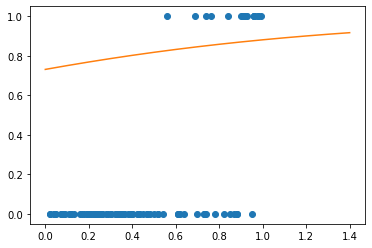

In [ ]:
regre(1,1)

Se modifica el valor de b0 a 3, y el valor de b1 a 2, dando como resultado el siguiente:

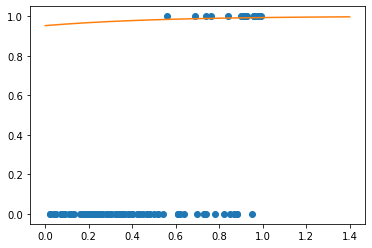

In [ ]:
regre(3,2)

Se reduce tanto el parámetro b0 como b1 para reducir la curva en los valores a predecir

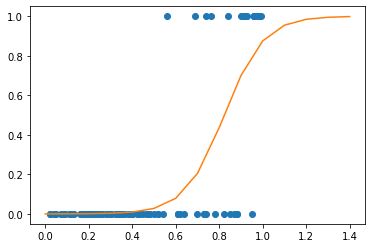

In [ ]:
regre(-9.06139369,11.00914087826194)

fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0


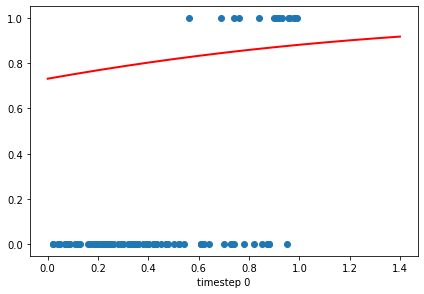

In [ ]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
ax.scatter(data.x,data.y)
b1 = [1, 1, 1, 1.5, -9.06139369]
b0 = [1, 1.4, 1.8, 1.8, 11.00914087826194]
#El metodo "arange", genera un vector con los rangos definidos (-11 hasta 11)
xLo = np.arange(0, 1.5,0.1)
# y sera nuestra ecuación lineal
line, = ax.plot(xLo, 1/(1 + np.exp(-( b0[0] + b1[0]*xLo)) ) , 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata( 1/(1 + np.exp(-( b0[i] + b1[i]*xLo)) ) )
    ax.set_xlabel(label)
    return line, ax



if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, 5), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim1.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()

A continuación se muestra la animación generada con los ensayos a ojo

In [ ]:
from IPython.display import HTML
# .gif necesita la librería imagemagick que puede ser instalada con !apt install imagemagick
# animation.save('poly.gif', writer='imagemagick', fps=20); 
anim1.save('animation.mp4', writer='ffmpeg', fps=20);
HTML(anim1.to_jshtml())

timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4


# Conclusiones

Los valores encontrados a ojo no tienen la rigurosidad matemática, por lo que su aplicación es altamente repetitiva y suceptible al error. Las rectas y curvas de regresión descritas no disponen de un grado de aproximación conocido, por lo que se recomienda hacer uso del error cuadrático medio MSE o el RMSE para comparar más concretamente cada iteración de los modelos. El modelo de regresión logística fue el más complicado para aproximar debido a que su fórmula tenía mayor complejidad en la variación de los parámetros.

##Preguntas adicionales

¿Es posible calibrar modelos de aprendizaje de máquina a ojo?
Contando con suerte si es posible estimar a ojo con una buena aproximación el ajuste de un modelo siempre y cuando su dimensionalidad permanezca en máximo 2, aun así, esta no es ni la mejor manera, ni la más efectiva de ajustar o calibrar un modelo.

¿Qué pasa con esta metodología cuando el número de parámetros aumenta?
Cuando el número de parámetros o dimensionalidad aumenta, la estimación no se hace tan sencilla a ojo pues queda imposible determinar visualmente todas las dimensiones a tener en cuenta para hacer un buen ajuste.

¿Cómo podría disponibilizar este método de ajuste gráfico de modelos dentro de una compañía?
Para poner a disposición de los colaboradores de una compañía implementaremos el uso de una aplicación web que logre graficar los datos requeridos y el usuario pueda modificar los parámetros observando cómo varían según su selección. 


# Ruta GitHub

https://github.com/dmontoyara/Optimizar-divertirse

# Bibliografía

 [1] Disooqi. (2017). drawing-animated-gifs-with-matplotlib. https://github.com/qcri/dialectID/blob/master/3d.py
 
 [2] Scikit-learn. (2020). sklearn.linear_model.LogisticRegression. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


